# Model Selection and Model Evaluation

In [1]:
import warnings
warnings.simplefilter('ignore')

## Model Evaluation

1. Estimator score method  

   Estimators come with a built-in default evaluation score  
   * Accuracy for classification
   * R2 score for regression     
2. Scoring parameter  
   Model selection and evaluation using tools, such as *model_selection.GridSearchCV* and *model_selection.cross_val_score*,        take a "scoring" parameter that controls what metric they apply to the estimators evaluated     
3. Metrics module and its functions  
   The metrics module implements functions assessing prediction error for specific purposes

### Metrics Module and its functions
* Metrics module exposes a number of functions for model evaluation
  * functions ending with _score return a value to maximize, the higher the better
  * functions ending with _error or _loss return a value to minimize, the lower the better. 
  

In [2]:
# Regression - r2_score, mean_absolute_error, mean_squared_error, median_absolute_error

from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error

boston = load_boston()
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print y_train.shape
reg = LinearRegression()
reg.fit(X_train,y_train)

print "R2 score = ", r2_score(y_test, reg.predict(X_test))
print "Mean Abs Error = ", mean_absolute_error(y_test, reg.predict(X_test))
print "Mean Squared Error = ", mean_squared_error(y_test, reg.predict(X_test))
print "Median Abs Error = ", median_absolute_error(y_test, reg.predict(X_test))


(379L,)
R2 score =  0.635362078667
Mean Abs Error =  3.6692173866
Mean Squared Error =  29.7905591642
Median Abs Error =  2.61938239211


Accuracy =  0.973684210526
Precision =  [ 1.   1.   0.9]
Recall =  [ 1.      0.9375  1.    ]
Confusion matrix 
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
F1 score =  [ 1.          0.96774194  0.94736842]
Predicted y 
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
Confusion matrix 
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


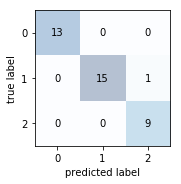

Log Loss =  0.0898187525757


In [3]:
# Classification - accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
# Note : roc_auc_score in scikit-learn works as is only on binary and multilabel classification, not multiclass 
# Note : roc_curve in scikit-learn works as is only on binary classification, not multiclass or multilabel

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, fbeta_score, roc_curve


iris = load_iris()
X,y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = RandomForestClassifier(n_estimators=1000)
clf.fit(X_train,y_train)


print "Accuracy = ", accuracy_score(y_test, clf.predict(X_test))
print "Precision = ", precision_score(y_test, clf.predict(X_test), average=None)
print "Recall = ", recall_score(y_test, clf.predict(X_test), average=None)
print "Confusion matrix \n", confusion_matrix(y_test, clf.predict(X_test))
print "F1 score = ", fbeta_score(y_test, clf.predict(X_test), beta=1, average=None)



import matplotlib.pyplot as plt
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

y_pred = clf.predict(X_test)
print "Predicted y \n", y_pred
cm = confusion_matrix(y_target=y_test, 
                      y_predicted=y_pred, 
                      binary=False)
print "Confusion matrix \n", cm

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

from sklearn.metrics import log_loss
y_predpr = clf.predict_proba(X_test)
print "Log Loss = ", log_loss(y_test, y_predpr)  #lower the better

[0 1]
['malignant', 'benign']
[[ 0.972  0.028]
 [ 0.048  0.952]
 [ 0.008  0.992]
 [ 0.104  0.896]
 [ 0.023  0.977]
 [ 0.012  0.988]
 [ 0.014  0.986]
 [ 0.007  0.993]
 [ 0.009  0.991]
 [ 0.002  0.998]
 [ 0.57   0.43 ]
 [ 0.097  0.903]
 [ 0.003  0.997]
 [ 0.684  0.316]
 [ 0.547  0.453]
 [ 0.887  0.113]
 [ 0.124  0.876]
 [ 0.992  0.008]
 [ 0.993  0.007]
 [ 1.     0.   ]
 [ 0.947  0.053]
 [ 0.979  0.021]
 [ 0.062  0.938]
 [ 0.     1.   ]
 [ 0.956  0.044]
 [ 0.009  0.991]
 [ 0.     1.   ]
 [ 0.889  0.111]
 [ 0.004  0.996]
 [ 1.     0.   ]
 [ 0.009  0.991]
 [ 0.971  0.029]
 [ 0.137  0.863]
 [ 0.98   0.02 ]
 [ 0.002  0.998]
 [ 0.973  0.027]
 [ 0.026  0.974]
 [ 0.964  0.036]
 [ 0.026  0.974]
 [ 0.981  0.019]
 [ 0.529  0.471]
 [ 0.047  0.953]
 [ 0.689  0.311]
 [ 0.     1.   ]
 [ 0.409  0.591]
 [ 0.998  0.002]
 [ 0.     1.   ]
 [ 0.045  0.955]
 [ 0.001  0.999]
 [ 0.992  0.008]
 [ 0.918  0.082]
 [ 0.865  0.135]
 [ 0.996  0.004]
 [ 0.     1.   ]
 [ 0.     1.   ]
 [ 0.001  0.999]
 [ 0.041  0.959]
 

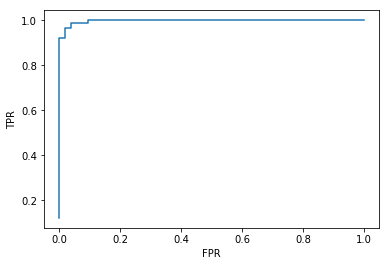

Log Loss =  0.10161356716


In [4]:
# Binary Classification - roc_auc_score, roc_curve and log loss

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve

bc = load_breast_cancer()
X,y = bc.data, bc.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)



clf_R = RandomForestClassifier(n_estimators=1000)
clf_R.fit(X_train,y_train)


print clf_R.classes_
print list(bc.target_names)
print clf_R.predict_proba(X_test) 
# The returned estimates for all classes are ordered by the label of classes, where classes are ordered as they are in self.classes_


print "RF roc auc score ", roc_auc_score(y_test, clf_R.predict_proba(X_test)[:,1] ) # probability of only positive class is provided

print "RF ROC Curve"
fpr, tpr, thresholds = roc_curve(y_test, clf_R.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

from sklearn.metrics import log_loss
y_predpr = clf_R.predict_proba(X_test)
print "Log Loss = ", log_loss(y_test, y_predpr)  #lower the better

### Understanding Log loss

* Log-loss measures the accuracy of a classifier - Minimising the Log Loss is basically equivalent to maximising the accuracy of   the classifier
* It is used when the model outputs a probability for each class, rather than just the most likely class.
* Log Loss heavily penalises classifiers that are confident about an incorrect classification. For example, if for a particular   observation, the classifier assigns a very small probability to the correct class then the corresponding contribution to the     Log Loss will be very large indeed. Naturally this is going to have a significant impact on the overall Log Loss for the         classifier. The bottom line is that it’s better to be somewhat wrong than emphatically wrong!

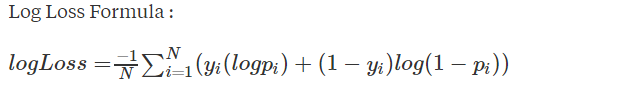

In [5]:
from IPython.display import Image
Image("Log_Loss_Formula.PNG")

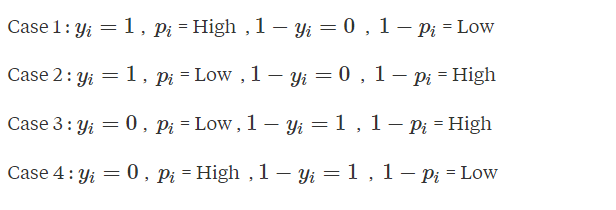

In [6]:
from IPython.display import Image
Image("Cases_log_loss.PNG")

Log loss measures the UNCERTAINTY of the probabilities of your model by comparing them to the true labels

To explain let's take example of binary classifier i.e. target is 1 or 0  

Case 1:

In this case y = 1 and p = high implies that we have got things right! Because the true value of the response agrees with our high probability. Now look closely.. occurence of Case 1 will significantly inflate the sum because, Yi * log (Pi) would be high and simultaneously the other term in the summation would be zero since 1 - Yi = 1 - 1 = 0. So more occurrences of Case 1 would inflate the sum and consequently inflate the mean.

Case 2:

In this case y = 1 and p = low. This is a totally undesirable case because our probability of Y being 1 is low but still the true value of Y is 1. Now again looking at the formula closely, the second term in the summation would be zero since 1- yi would be zero. And since p = low, Yi * log (Pi) would not inflate the sum as much as Case 1. So Case 2 would ultimately not affect the sum a lot.

Similarly the occurrences of Case 3 would inflate the sum significantly and occurrences of Case 4 would not.

Suppose we have more of Case 1s and Case 3s, then the sum inside the logloss formula would be greater (would tend to increase). This would imply that the mean (/N) would also tend to increase and will be substantially larger in comparison to what it would have been if Case2s and Case4s got added. So now this value is as large as possible at Case1s and Case3s which indicates a good prediction. If we  multiply it by (- 1) , we would make the value as small as possible.

This would now intuitively mean, smaller the value, better is the model i.e. smaller the logloss, better is the model i.e. smaller the UNCERTAINTY, better is the model.  

## Scoring parameter

Model selection and evaluation using tools, such as *model_selection.GridSearchCV* and *model_selection.cross_val_score*, take a "scoring" parameter that controls what metric they apply to the estimators evaluated

Example of Scoring parameters for classification - accuracy, f1, precision, recall, neg_log_loss  

Example of Scoring parameters for regression - neg_mean_absolute_error, neg_mean_squared_error, neg_median_absolute_error, r2  

Example of Scoring parameters for clustering - adjusted_rand_score

## Converting metrics function into a scorer object
* All the functions in metrics module do not have corresponding "scorer" object because scorer objects sometimes require additional parameters. Using "make_scorer", one can convert functions in metric module to scoring parameter by specifying additional parameters required
* Also, to convert functions ending in _error or _loss into a scorer object using "make_scorer", set the *greater_is_better* parameter to False. This is because cross validation convention is that scorers return higher values for better models.

In [7]:
# Converting a metrics function to scorer object

from sklearn.metrics import fbeta_score, make_scorer
ftwo_scorer = make_scorer(fbeta_score, beta=2)
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
grid = GridSearchCV(LinearSVC(), param_grid={'C': [1, 10]}, scoring=ftwo_scorer)

It is also possible to create a custom scorer object by specifying own python function and necessary additional parameters

## Re-sampling Methods 

* Train/test split

* Cross Validation  
  * Holdout method 
  * K-fold cross validation
  * Leave-one-out (LOO) cross validation
  * Stratified k-fold cross validation  
  
* Bootstrap method 



### Train/test split
* Split the dataset into two pieces, so that the model can be trained and tested on different data
* Testing accuracy is a better estimate than training accuracy of out-of-sample performance
* But, it provides a high variance estimate since changing which observations happen to be in the testing set can significantly change testing accuracy
* Disadvantage - Using train/test split method, a model can either suffer from underfitting(high bias) if the model is too simple or overfitting (high variance) if the model is too complex for the underlying training data.

In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# read in the iris data
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

# use train/test split with different random_state values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

# check classification accuracy of KNN with K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.973684210526


### Hold out method

* The data is divided into three parts - training set, validation set and test set
* Training set is used to fit different models, Validation set is used to check performance for model selection and Test set is used to check how well the model generalizes on totally new unseen data
* Disadvantage - performance estimate on test set will depend heavily on how training set and validation set were chosen (Selection Bias)i.e. if the characteristics of data is completely different for training and validation set then the model will not perform well on test set. e.g. imbalanced classes issue in training and validation set.

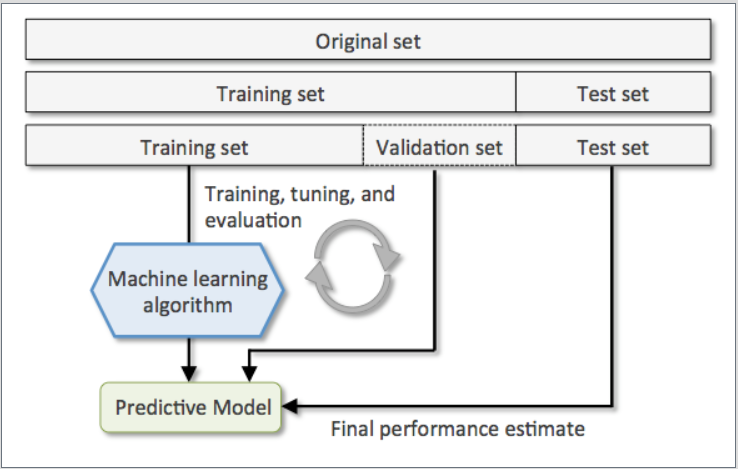

In [9]:
from IPython.display import Image
Image("Holdout_method.PNG")

### K -Fold Cross Validation

1. Split the dataset into K equal partitions (or "folds") *without replacement*
2. Use fold 1 as the testing set and the *union* of the other folds as the training set.
3. Calculate testing accuracy.
4. Repeat steps 2 and 3 K times, using a different fold as the testing set each time.
5. Use the average testing accuracy as the estimate of out-of-sample accuracy.



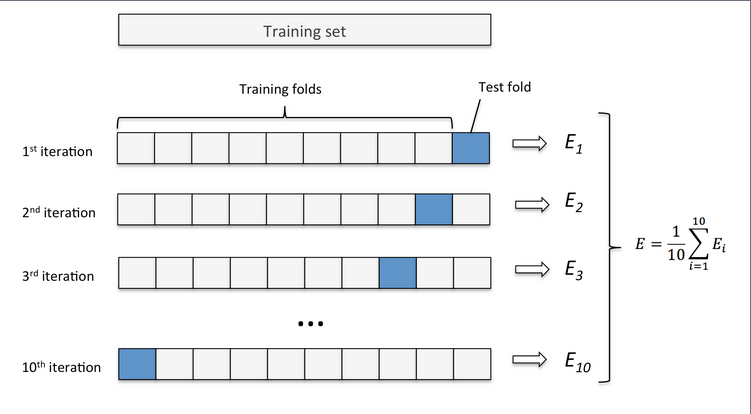

In [10]:
from IPython.display import Image
Image('K-Fold_CV.PNG')

Advantages of K-fold CV
1. Selection bias in samples is greatly reduced
2. More "efficient" use of data (every observation is used for both training and testing)

Disadvantages of K-fold CV compared to Train/test split
1. Higher running time

Recommendations for K-fold CV:
1. K can be any number, but K=10 is generally recommended
2. For classification problems, <b>stratified sampling</b> is recommended for creating the folds (for avoiding imbalanced class issue)

    * Each response class should be represented with equal proportions in each of the K folds
    * scikit-learn's *cross_val_score* function does this by default
3. If the dataset is very small, <b>leave-one-out(LOO)</b> CV is the recommended approach.  In LOO, we set the number of folds equal to dataset size (k=n) i.e. no. of samples

* If we increase the value of k, more training data will be used in each iteration, resulting in 
  1. Lower bias
  2. Higher runtime 
  3. Higher variance (since training folds will be much similar)  
  

* The opposite happens if we decrease the value of k

* Using cross_val_score we can distribute the evaluation of different folds across multiple CPUs on our machine. n_jobs = 1 will result in utilizing only one CPU, n_jobs = 2 will result in utilizing two CPUs and <b>n_jobs = -1</b> will result in utilizing all CPUs of the machine in parallel 

* CV can be used for selecting tuning parameters, choosing between models, and selecting features

In [11]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier


iris = load_iris()
X = iris.data
y = iris.target


# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy', n_jobs=-1)  # Put cv = n in case of LOO
print(scores)
print(scores.mean())
print(scores.std())

C:\Users\prati\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


[ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ]
0.966666666667
0.04472135955


### Bootstrap Method

* Random resampling method with replacement 
* The whole dataset is taken and split into training and test sets according to some proportion.
* A sample that occurs in the train split will never occur in the test split and vice-versa
* After split, resampling with replacement is performed on training and test set a certain number of times.
* Contrary to other cross-validation strategies, bootstrapping will allow some samples to occur several times in each splits i.e. training split can contain duplicate samples and test split can contain duplicates samples.
* It is deprecated in scikit-learn 

<b>Important Note</b> - Performing Feature Selection using all the data (training+test) then using cross validation to select the model is a wrong approach because if you perform feature selection on all of the data and then cross-validate, then the test data in each fold of the cross-validation procedure was also used to choose the features and this is what biases the performance analysis. The way to work around is that we need to repeat the whole process in each iteration i.e. feature selection and cross validation in each fold (perform all feature engineering and selection within each cross-validation iteration)

## Tuning Hyperparameters via GridSearchCV

It's a brute force exhaustive search paradigm where we specify a list of values for different hyperparameters and the computer evaluates the model performance for each combination of those to obtain the optimal set

Disadvantage - If there are too many permutations of parameters to search, it can take a long time and can be computationally expensive

In [12]:
from sklearn.datasets import load_iris
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

iris = load_iris()
X = iris.data
y = iris.target

pipe_rf = Pipeline([('scl', StandardScaler()), ('clf', RandomForestClassifier())])
print "Parameter list to tune \n" 
print StandardScaler().get_params()
print RandomForestClassifier().get_params()
print pipe_rf.get_params()

estimator_range = [10, 100, 1000,]
feature_range = ['sqrt', 'log2']
min_samples_leaf_range = [1,2,3,4]
#Overall 3*2*4 = 24 combinations with ten times CV

param_grid = {'clf__n_estimators': estimator_range, 'clf__max_features': feature_range, 'clf__min_samples_leaf': min_samples_leaf_range}

gs = GridSearchCV(estimator=pipe_rf, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1)

gs.fit(X,y)

Parameter list to tune 

{'copy': True, 'with_mean': True, 'with_std': True}
{'warm_start': False, 'oob_score': False, 'n_jobs': 1, 'min_impurity_decrease': 0.0, 'verbose': 0, 'max_leaf_nodes': None, 'bootstrap': True, 'min_samples_leaf': 1, 'n_estimators': 10, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'criterion': 'gini', 'random_state': None, 'min_impurity_split': None, 'max_features': 'auto', 'max_depth': None, 'class_weight': None}
{'scl': StandardScaler(copy=True, with_mean=True, with_std=True), 'clf__warm_start': False, 'clf__verbose': 0, 'clf__random_state': None, 'clf__n_jobs': 1, 'clf__min_samples_split': 2, 'scl__with_std': True, 'clf__n_estimators': 10, 'clf__bootstrap': True, 'clf': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_we

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
        ...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'clf__max_features': ['sqrt', 'log2'], 'clf__min_samples_leaf': [1, 2, 3, 4], 'clf__n_estimators': [10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [13]:
gs.grid_scores_  # 24 scores

C:\Users\prati\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.96000, std: 0.04422, params: {'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 1, 'clf__n_estimators': 10},
 mean: 0.96667, std: 0.03333, params: {'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 1, 'clf__n_estimators': 100},
 mean: 0.96000, std: 0.04422, params: {'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 1, 'clf__n_estimators': 1000},
 mean: 0.95333, std: 0.06000, params: {'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 2, 'clf__n_estimators': 10},
 mean: 0.95333, std: 0.06000, params: {'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 2, 'clf__n_estimators': 100},
 mean: 0.95333, std: 0.06000, params: {'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 2, 'clf__n_estimators': 1000},
 mean: 0.96667, std: 0.04472, params: {'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 3, 'clf__n_estimators': 10},
 mean: 0.95333, std: 0.06000, params: {'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 3, 'clf__n_estimators': 100},
 mean: 0.95333, s

In [14]:
gs.best_score_

0.96666666666666667

In [15]:
gs.best_params_

{'clf__max_features': 'sqrt',
 'clf__min_samples_leaf': 1,
 'clf__n_estimators': 100}

In [16]:
gs.best_estimator_

Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
        ...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [17]:
gs.predict([[45, 67, 100, 110]])

array([2])

## Tuning Hyperparameters via RandomizedSearchCV

* Searching many different parameters at once may be computationally infeasible
* RandomizedSearchCV searches a subset of the parameters, and you control the computational "budget"

In [18]:
from sklearn.datasets import load_iris
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

iris = load_iris()
X = iris.data
y = iris.target

pipe_rf = Pipeline([('scl', StandardScaler()), ('clf', RandomForestClassifier())])
print "Parameter list to tune \n" 
print StandardScaler().get_params()
print RandomForestClassifier().get_params()
print pipe_rf.get_params()

estimator_range = [10, 100, 1000,]
feature_range = ['sqrt', 'log2']
min_samples_leaf_range = [1,2,3,4]
#Overall 3*2*4 = 24 combinations with ten times CV

param_grid = {'clf__n_estimators': estimator_range, 'clf__max_features': feature_range, 'clf__min_samples_leaf': min_samples_leaf_range}

rs = RandomizedSearchCV(estimator=pipe_rf, param_distributions=param_grid, scoring='accuracy', n_iter=10, cv=10, n_jobs=-1)

rs.fit(X,y)

Parameter list to tune 

{'copy': True, 'with_mean': True, 'with_std': True}
{'warm_start': False, 'oob_score': False, 'n_jobs': 1, 'min_impurity_decrease': 0.0, 'verbose': 0, 'max_leaf_nodes': None, 'bootstrap': True, 'min_samples_leaf': 1, 'n_estimators': 10, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'criterion': 'gini', 'random_state': None, 'min_impurity_split': None, 'max_features': 'auto', 'max_depth': None, 'class_weight': None}
{'scl': StandardScaler(copy=True, with_mean=True, with_std=True), 'clf__warm_start': False, 'clf__verbose': 0, 'clf__random_state': None, 'clf__n_jobs': 1, 'clf__min_samples_split': 2, 'scl__with_std': True, 'clf__n_estimators': 10, 'clf__bootstrap': True, 'clf': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_we

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
        ...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'clf__max_features': ['sqrt', 'log2'], 'clf__min_samples_leaf': [1, 2, 3, 4], 'clf__n_estimators': [10, 100, 1000]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='accuracy', verbose=0)

In [19]:
rs.grid_scores_

C:\Users\prati\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.96000, std: 0.04422, params: {'clf__max_features': 'log2', 'clf__min_samples_leaf': 1, 'clf__n_estimators': 100},
 mean: 0.96000, std: 0.04422, params: {'clf__max_features': 'log2', 'clf__min_samples_leaf': 1, 'clf__n_estimators': 1000},
 mean: 0.95333, std: 0.06000, params: {'clf__max_features': 'log2', 'clf__min_samples_leaf': 3, 'clf__n_estimators': 100},
 mean: 0.96000, std: 0.04422, params: {'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 1, 'clf__n_estimators': 1000},
 mean: 0.95333, std: 0.06000, params: {'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 2, 'clf__n_estimators': 1000},
 mean: 0.95333, std: 0.06000, params: {'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 2, 'clf__n_estimators': 100},
 mean: 0.95333, std: 0.06000, params: {'clf__max_features': 'log2', 'clf__min_samples_leaf': 4, 'clf__n_estimators': 100},
 mean: 0.95333, std: 0.06000, params: {'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 3, 'clf__n_estimators': 100},
 mean: 0.9533

In [20]:
rs.best_score_

0.95999999999999996

In [21]:
rs.best_params_

{'clf__max_features': 'log2',
 'clf__min_samples_leaf': 1,
 'clf__n_estimators': 100}

In [22]:
rs.best_estimator_

Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
        ...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [23]:
rs.predict([[45, 67, 100, 110]])

array([2])

## Nested Cross-Validation 

1. When we have selected the model parameters and we want to evaluate model performance, then we use CV with k-iterations to get stable estimate of average model performance over k iterations.
2. In order to select model parameters, we use grid search or randomized search and use CV with k-iterations to select the parameters providing best evaluation metric (e.g. highest accuracy). For every combination of parameters, CV with k-iterations are performed and average evaluation metric is noted. Finally, the best average evaluation metric and its parameter combinations are chosen. 
3. If we use CV to first select parameters and then subsequently use CV to evaluate model performance, it will give us overly optimistic estimate  as Model selection without nested CV uses the same data to tune model parameters and evaluate model performance. Information may thus “leak” into the model and overfit the data. The magnitude of this effect is primarily dependent on the size of the dataset and the stability of the model.
4. A better approach is to use nested CV for hyperparameter tuning and evaluating model performance. The outer CV estimates the performance of this model fitting approach and the inner CV does the selection of hyperparameters (this means that the test set of outer CV is not seen by inner CV while performing hyperparameter selection).

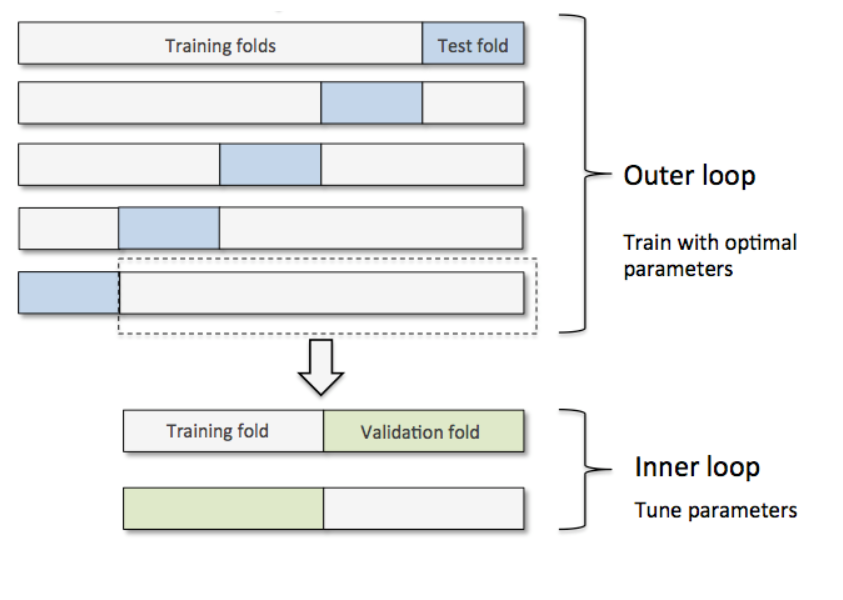

In [24]:
from IPython.display import Image
Image('Nested_CV.PNG')

* In nested cross-validation, we have an outer k-fold cross-validation loop to split the data into training and test folds, and an inner loop is used to select the model via k-fold cross-validation on the training fold. After model selection, the test fold is then used to evaluate the model performance.
* After we have identified our “favorite” algorithm, we can follow-up with a “regular” k-fold cross-validation approach (on the complete training set) to find its “optimal” hyperparameters and evaluate it on the independent test set.

In [25]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

iris = load_iris()
X = iris.data
y = iris.target

pipe_rf = Pipeline([('scl', StandardScaler()), ('clf', RandomForestClassifier())])


estimator_range = [10, 100, 1000,]


param_grid = {'clf__n_estimators': estimator_range}

gs = GridSearchCV(estimator=pipe_rf, param_grid=param_grid, scoring='accuracy', cv=2, n_jobs=-1)

scores = cross_val_score(gs, X, y, scoring='accuracy', cv=5)
print "CV Accuracy"
print np.mean(scores)
print "+/-", np.std(scores)

CV Accuracy
0.966666666667
+/- 0.0210818510678
